In [1]:
import scipy
import numpy as np

# For benchmarking
import time
from scipy.integrate import nquad

# For plotting
import matplotlib.pyplot as plt

# To avoid copying things to GPU memory,
# ideally allocate everything in torch on the GPU
# and avoid non-torch function calls
import torch
torch.set_printoptions(precision=10) # Set displayed output precision to 10 digits

from torchquad import enable_cuda # Necessary to enable GPU support
from torchquad import Trapezoid, Simpson, Boole, MonteCarlo, VEGAS # The available integrators
import torchquad

In [2]:
enable_cuda() # Use this to enable GPU support

In [32]:
def f(x):
    return torch.exp(3.0j*x) * torch.pow(x,2)

def print_error(result,solution):
    print("Results:",result.item())
    print(f"Abs. Error: {(torch.abs(result - solution).item()):.8e}")
    print(f"Rel. Error: {(torch.abs((result - solution) / solution).item()):.8e}")

solution = -2.0j / 27.0 * (1.0 + (17.0 + 6.0j) * torch.exp(torch.tensor([6.0j])) )

Text(0, 0.5, 'f($x$)')

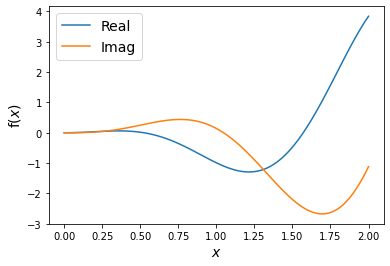

In [33]:
points = torch.linspace(0,2,100)
real_part = f(points).real
imag_part = f(points).imag

plt.plot(points.cpu(),real_part.cpu()) # Note that for plotting we have to move the values to the CPU first
plt.plot(points.cpu(),imag_part.cpu()) # Note that for plotting we have to move the values to the CPU first
plt.legend(["Real", "Imag"],fontsize=14)
plt.xlabel("$x$",fontsize=14)
plt.ylabel("f($x$)",fontsize=14)

In [34]:
integration_domain = [[0, 2]] # Integration domain is always a list of lists to allow arbitrary dimensionality.
tp = Trapezoid()  # Initialize a trapezoid solver

In [35]:
result = tp.integrate(f, dim=1, N=101, integration_domain=integration_domain)
print_error(result,solution)

Results: (0.07512567937374115-1.407015323638916j)
Abs. Error: 4.21665376e-04
Rel. Error: 2.99190753e-04


In [36]:
simp = Simpson()
result = simp.integrate(f, dim=1, N=101, integration_domain=integration_domain)
print_error(result,solution)

Results: (0.0748857706785202-1.4073622226715088j)
Abs. Error: 1.21286661e-07
Rel. Error: 8.60583995e-08


In [37]:
mc = MonteCarlo()
result = mc.integrate(f, dim=1, N=101, integration_domain=integration_domain)
print_error(result,solution)

Results: (0.0882788747549057-1.2951914072036743j)
Abs. Error: 1.12967424e-01
Rel. Error: 8.01555291e-02


In [38]:
vegas = VEGAS()
result = vegas.integrate(f,dim=1,N=101,integration_domain=integration_domain)
print_error(result,solution)

RuntimeError: result type ComplexFloat can't be cast to the desired output type Float